In [6]:
import pandas as pd
import numpy as np

# My Applied Data Sciences Capstone Project

## Reading the Airbnb .csv file

In [7]:
df = pd.read_csv(r'C:\Users\36307\Downloads\new-york-city-airbnb-open-data\AB_NYC_2019.csv')

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.shape

(48895, 16)

## Extract the features that I will probably need

In [10]:
df = df[['name','neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights']]

In [11]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10


## Dealing with the outliers and missing values

In [12]:
df.describe()

,latitude,longitude,price,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962
std,0.054530,0.046157,240.154170,20.510550
min,40.499790,-74.244420,0.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000
50%,40.723070,-73.955680,106.000000,3.000000
75%,40.763115,-73.936275,175.000000,5.000000
max,40.913060,-73.712990,10000.000000,1250.000000


In [13]:
missing_data = df.isnull()
missing_data.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

name
False    48879
True        16
Name: name, dtype: int64

neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64

neighbourhood
False    48895
Name: neighbourhood, dtype: int64

latitude
False    48895
Name: latitude, dtype: int64

longitude
False    48895
Name: longitude, dtype: int64

room_type
False    48895
Name: room_type, dtype: int64

price
False    48895
Name: price, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64



In [15]:
df.dtypes

name                    object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
dtype: object

In [16]:
df[["price"]] = df[["price"]].astype("float")

In [17]:
df.dtypes

name                    object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                  float64
minimum_nights           int64
dtype: object

In [18]:
df.describe()

,latitude,longitude,price,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962
std,0.054530,0.046157,240.154170,20.510550
min,40.499790,-74.244420,0.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000
50%,40.723070,-73.955680,106.000000,3.000000
75%,40.763115,-73.936275,175.000000,5.000000
max,40.913060,-73.712990,10000.000000,1250.000000


Text(0.5, 1.0, 'price bins')

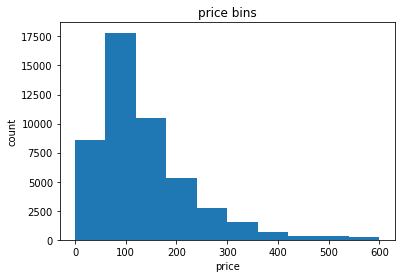

In [19]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["price"], range=[0, 600.0])
range=[6.5, 12.5]

plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [29]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=6):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

In [30]:
drop_numerical_outliers(df)

C:\Users\36307\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  """


In [31]:
df.describe()

,latitude,longitude,price,minimum_nights
count,47958.000000,47958.000000,47958.000000,47958.000000
mean,40.728891,-73.951759,137.170837,5.770820
std,0.054538,0.045990,102.589877,8.532786
min,40.522110,-74.182590,0.000000,1.000000
25%,40.689930,-73.982747,69.000000,1.000000
50%,40.722805,-73.955380,105.000000,2.000000
75%,40.763177,-73.935780,175.000000,5.000000
max,40.913060,-73.721730,780.000000,59.000000


In [32]:
df

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10
...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10
48893,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1


## A histogram for the distribution of price variable.

Text(0.5, 1.0, 'price bins')

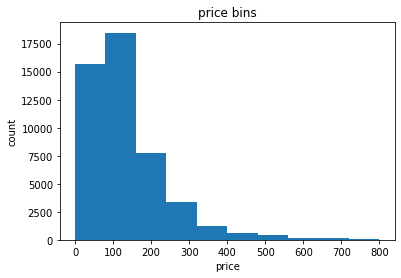

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["price"], range=[0, 800.0])
range=[6.5, 12.5]

plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

### Here I created dummy variables from the room types, but later I will exclude these.

In [34]:
dummy_variable = pd.get_dummies(df["room_type"])
dummy_variable

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
48890,0,1,0
48891,0,1,0
48892,1,0,0
48893,0,0,1


In [35]:
df = pd.concat([df, dummy_variable], axis=1)
#df.drop("room_type", axis = 1, inplace=True)

In [36]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Entire home/apt,Private room,Shared room
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,0,1,0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,1,0,0


## Correlation matrix

In [37]:
df.corr()

,latitude,longitude,price,minimum_nights,Entire home/apt,Private room,Shared room
latitude,1.000000,0.079612,0.068133,0.043879,-0.006565,0.005412,0.003829
longitude,0.079612,1.000000,-0.275900,-0.104190,-0.189787,0.181710,0.028046
price,0.068133,-0.275900,1.000000,0.053969,0.519492,-0.486900,-0.111077
minimum_nights,0.043879,-0.104190,0.053969,1.000000,0.142017,-0.136985,-0.017674
Entire home/apt,-0.006565,-0.189787,0.519492,0.142017,1.000000,-0.953427,-0.160922
Private room,0.005412,0.181710,-0.486900,-0.136985,-0.953427,1.000000,-0.144266
Shared room,0.003829,0.028046,-0.111077,-0.017674,-0.160922,-0.144266,1.000000


## Some boxplot to visualize the price values.

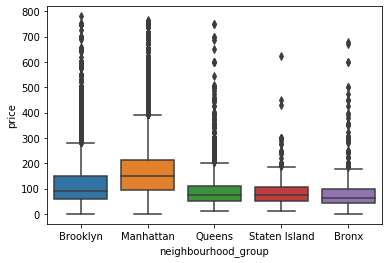

In [38]:
qw

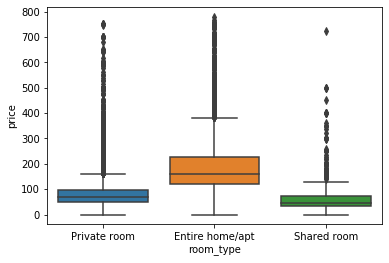

In [39]:
sns.boxplot(x="room_type", y="price", data=df)

## I made some groupby statements to define which neighborhood will I work with.

In [40]:
df['neighbourhood_group'].value_counts()

Manhattan        21053
Brooklyn         19853
Queens            5620
Bronx             1076
Staten Island      356
Name: neighbourhood_group, dtype: int64

In [41]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             83.954461
Brooklyn         115.760087
Manhattan        172.330689
Queens            94.168683
Staten Island     91.609551
Name: price, dtype: float64

In [43]:
count = df['neighbourhood'].value_counts().to_frame()

In [45]:
count.head()

,neighbourhood
Williamsburg,3874
Bedford-Stuyvesant,3677
Harlem,2621
Bushwick,2447
Hell's Kitchen,1925


 ## I choose Staten Island to countinue my analysis

In [46]:
sidf = df[df['neighbourhood_group'].str.contains("Staten Island")].reset_index(drop=True)
#sidf.head()
sidf.shape

(356, 11)

In [47]:
sidf.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Entire home/apt,Private room,Shared room
0,New York room with a view,Staten Island,St. George,40.64524,-74.08088,Private room,70.0,2,0,1,0
1,A SpeciaL!! Private Room in NY,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36.0,2,0,1,0
2,B NYC Staten Alternative...,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37.0,2,0,1,0
3,C Private Room By The Ferry,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37.0,2,0,1,0
4,D Private Che@p Room 2 Explore NYC,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36.0,2,0,1,0


## I visualized the available Airbnbs in Staten Island

In [48]:
import folium

In [143]:
map_newyork = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood, name in zip(sidf['latitude'], sidf['longitude'], sidf['neighbourhood'], sidf['name']):
    label = '{}, {}'.format(neighbourhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [50]:
sidf.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,Entire home/apt,Private room,Shared room
0,New York room with a view,Staten Island,St. George,40.64524,-74.08088,Private room,70.0,2,0,1,0
1,A SpeciaL!! Private Room in NY,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36.0,2,0,1,0
2,B NYC Staten Alternative...,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37.0,2,0,1,0
3,C Private Room By The Ferry,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37.0,2,0,1,0
4,D Private Che@p Room 2 Explore NYC,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36.0,2,0,1,0


## Here I made a groupby with Neighborhoods in Staten Island with the means of Airbnb prices in the neighborhoods

In [51]:
price_mean = sidf.groupby('neighbourhood')['price'].mean().to_frame()
price_mean

,price
neighbourhood,
Arden Heights,66.333333
Arrochar,115.000000
"Bay Terrace, Staten Island",102.500000
Bull's Head,47.333333
Castleton Corners,139.750000
Clifton,84.933333
Concord,58.192308
Dongan Hills,79.428571
Eltingville,141.666667


In [52]:
price_mean = price_mean.reset_index()

### This rename is only for later merges.

In [53]:
price_mean.rename(columns={'neighbourhood': 'Neighborhood'}, inplace=True)
price_mean.head()

,Neighborhood,price
0,Arden Heights,66.333333
1,Arrochar,115.000000
2,"Bay Terrace, Staten Island",102.500000
3,Bull's Head,47.333333
4,Castleton Corners,139.750000


In [54]:
CLIENT_ID1 = 'IV5QYLW03HPCUP2FVOZE1MPLZV1LS5OGMDOKHUEJM3HDL3JR' # your Foursquare ID
CLIENT_SECRET1 = 'A1AFPWOGU2PZLFEKZJAU3QA11S0QNJ4W5BJFUMY4XCIUCSF1' # your Foursquare Secret
VERSION = '20190228' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IV5QYLW03HPCUP2FVOZE1MPLZV1LS5OGMDOKHUEJM3HDL3JR
CLIENT_SECRET: A1AFPWOGU2PZLFEKZJAU3QA11S0QNJ4W5BJFUMY4XCIUCSF1


## Get the nearby venues from FOURSQUARE API

In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
import requests
staisl_venues = getNearbyVenues(names=sidf['neighbourhood'],
                                   latitudes=sidf['latitude'],
                                   longitudes=sidf['longitude']
                                  )

St. George
Tompkinsville
Tompkinsville
Tompkinsville
Tompkinsville
Emerson Hill
Shore Acres
Arrochar
Arrochar
Arrochar
Clifton
Graniteville
Stapleton
New Springville
Tompkinsville
Mariners Harbor
Concord
Concord
Arrochar
Tompkinsville
Port Richmond
St. George
Port Richmond
Shore Acres
Concord
Clifton
St. George
St. George
St. George
Eltingville
St. George
Clifton
Stapleton
Lighthouse Hill
Tompkinsville
West Brighton
Stapleton
Mariners Harbor
Tompkinsville
Great Kills
St. George
West Brighton
St. George
Tompkinsville
Dongan Hills
Tompkinsville
Castleton Corners
Randall Manor
Todt Hill
Great Kills
Silver Lake
Tompkinsville
St. George
Randall Manor
Concord
Shore Acres
Grymes Hill
Stapleton
Tompkinsville
Stapleton
Castleton Corners
New Brighton
Concord
Midland Beach
Clifton
Clifton
St. George
Richmondtown
Tompkinsville
Concord
Tompkinsville
Tompkinsville
Howland Hook
Clifton
St. George
New Dorp Beach
Howland Hook
Prince's Bay
South Beach
Mariners Harbor
West Brighton
South Beach
West Brigh

In [57]:
print(staisl_venues.shape)
staisl_venues.head()

(5528, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.64524,-74.08088,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.64524,-74.08088,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.64524,-74.08088,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.64524,-74.08088,Nike Factory Store,40.645753,-74.077702,Sporting Goods Shop
4,St. George,40.64524,-74.08088,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium


## Here I made the groupby by neighborhoods in Staten Island and counted the venues

In [58]:
venue_count = staisl_venues.groupby('Neighborhood')['Venue'].count().to_frame()

In [59]:
venue_count.head()

,Venue
Neighborhood,
Arden Heights,22
Arrochar,345
"Bay Terrace, Staten Island",20
Bull's Head,82
Castleton Corners,65


## Merge the venues with the Airbnb prices.

In [60]:
finaldf = price_mean.merge(venue_count, on='Neighborhood')

In [61]:
finaldf

,Neighborhood,price,Venue
0,Arden Heights,66.333333,22
1,Arrochar,115.000000,345
2,"Bay Terrace, Staten Island",102.500000,20
3,Bull's Head,47.333333,82
4,Castleton Corners,139.750000,65
5,Clifton,84.933333,153
6,Concord,58.192308,365
7,Dongan Hills,79.428571,78
8,Eltingville,141.666667,77
9,Emerson Hill,68.200000,63


## Here It does not seems to be any connection

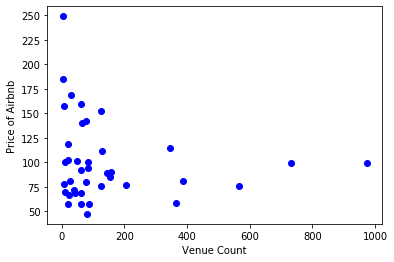

In [62]:
import matplotlib.pyplot as plt

plt.scatter(finaldf['Venue'], finaldf['price'],  color='blue')
plt.xlabel("Venue Count")
plt.ylabel("Price of Airbnb")
plt.show()

In [63]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(finaldf[['Venue']])
y = np.asanyarray(finaldf[['price']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.02896658]]
Intercept:  [104.70852954]


#### y hat = 104,7 - 0,03 * Venues   ---> The venue count is not connected with the price

### Import review per month and minimum_nights variable into the analysis.

In [64]:
rpm = pd.read_csv(r'C:\Users\36307\Downloads\new-york-city-airbnb-open-data\AB_NYC_2019.csv')

In [71]:
rpm = rpm[['neighbourhood_group', 'neighbourhood', 'reviews_per_month', 'minimum_nights']]

In [72]:
rpm.head()

,neighbourhood_group,neighbourhood,reviews_per_month,minimum_nights
0,Brooklyn,Kensington,0.21,1
1,Manhattan,Midtown,0.38,1
2,Manhattan,Harlem,NaN,3
3,Brooklyn,Clinton Hill,4.64,1
4,Manhattan,East Harlem,0.10,10


In [84]:
missing_data_rpm = rpm.isnull()
missing_data_rpm.head(5)

,neighbourhood_group,neighbourhood,reviews_per_month,minimum_nights
0,False,False,False,False
1,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


In [76]:
for column in missing_data_rpm.columns.values.tolist():
    print(column)
    print (missing_data_rpm[column].value_counts())
    print("")    

neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64

neighbourhood
False    48895
Name: neighbourhood, dtype: int64

reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64



In [80]:
rpm = rpm.dropna()

In [85]:
for column in missing_data_rpm.columns.values.tolist():
    print(column)
    print (missing_data_rpm[column].value_counts())
    print("")   

neighbourhood_group
False    38843
Name: neighbourhood_group, dtype: int64

neighbourhood
False    38843
Name: neighbourhood, dtype: int64

reviews_per_month
False    38843
Name: reviews_per_month, dtype: int64

minimum_nights
False    38843
Name: minimum_nights, dtype: int64



In [86]:
rpm.shape

(38843, 4)

In [87]:
rpm.head()

,neighbourhood_group,neighbourhood,reviews_per_month,minimum_nights
0,Brooklyn,Kensington,0.21,1
1,Manhattan,Midtown,0.38,1
3,Brooklyn,Clinton Hill,4.64,1
4,Manhattan,East Harlem,0.10,10
5,Manhattan,Murray Hill,0.59,3


In [88]:
rpm = rpm[rpm['neighbourhood_group'].str.contains("Staten Island")].reset_index(drop=True)

In [89]:
rpm.describe()

,reviews_per_month,minimum_nights
count,314.000000,314.000000
mean,1.872580,3.420382
std,1.685495,5.555560
min,0.020000,1.000000
25%,0.702500,1.000000
50%,1.410000,2.000000
75%,2.615000,3.000000
max,10.120000,33.000000


In [92]:
rpm_mean = rpm.groupby('neighbourhood')['reviews_per_month'].mean().to_frame()

In [95]:
mn_mean = rpm.groupby('neighbourhood')['minimum_nights'].mean().to_frame()

In [100]:
rpm_mean = rpm_mean.reset_index()
mn_mean = mn_mean.reset_index()
rpm_mean.rename(columns={'neighbourhood': 'Neighborhood'}, inplace=True)
mn_mean.rename(columns={'neighbourhood': 'Neighborhood'}, inplace=True)

## Merging the dataframes

In [102]:
rpm_mn = rpm_mean.merge(mn_mean, on='Neighborhood')

In [103]:
rpm_mn.head()

,Neighborhood,reviews_per_month,minimum_nights
0,Arden Heights,1.040000,9.50
1,Arrochar,1.114000,2.55
2,"Bay Terrace, Staten Island",0.455000,16.50
3,Bull's Head,2.423333,1.00
4,Castleton Corners,1.930000,2.50


In [104]:
final_df = finaldf.merge(rpm_mn, on='Neighborhood')

## This is the final dataframe, with which I will do the analysis.

In [105]:
final_df

,Neighborhood,price,Venue,reviews_per_month,minimum_nights
0,Arden Heights,66.333333,22,1.040000,9.500000
1,Arrochar,115.000000,345,1.114000,2.550000
2,"Bay Terrace, Staten Island",102.500000,20,0.455000,16.500000
3,Bull's Head,47.333333,82,2.423333,1.000000
4,Castleton Corners,139.750000,65,1.930000,2.500000
5,Clifton,84.933333,153,1.966923,1.769231
6,Concord,58.192308,365,1.512500,5.458333
7,Dongan Hills,79.428571,78,2.068571,2.142857
8,Eltingville,141.666667,77,2.470000,3.000000
9,Emerson Hill,68.200000,63,1.866667,1.666667


## Multiple linear regression

In [106]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(final_df[['Venue','reviews_per_month','minimum_nights']])
y = np.asanyarray(final_df[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -0.03331013 -12.07176452  -1.76579073]]


### It seems that the reviews per month grows as the price lows. So many people tend to pay less for Airbnb and therefore more people write reviews to the Airbnbs with lesser price.

## Creating dummy variable from prices lesser than 90

In [112]:
final_df['good_price'] = (final_df['price'] >= 90)

In [114]:
final_df.head()

,Neighborhood,price,Venue,reviews_per_month,minimum_nights,good_price
0,Arden Heights,66.333333,22,1.040000,9.50,False
1,Arrochar,115.000000,345,1.114000,2.55,True
2,"Bay Terrace, Staten Island",102.500000,20,0.455000,16.50,True
3,Bull's Head,47.333333,82,2.423333,1.00,False
4,Castleton Corners,139.750000,65,1.930000,2.50,True


In [121]:
final_df.good_price = final_df.good_price.astype(int)

In [122]:
final_df.head()

,Neighborhood,price,Venue,reviews_per_month,minimum_nights,good_price
0,Arden Heights,66.333333,22,1.040000,9.50,0
1,Arrochar,115.000000,345,1.114000,2.55,1
2,"Bay Terrace, Staten Island",102.500000,20,0.455000,16.50,1
3,Bull's Head,47.333333,82,2.423333,1.00,0
4,Castleton Corners,139.750000,65,1.930000,2.50,1


## I tried to predict with logistic regression if the features I choose are connected with the prices of Airbnbs.

In [138]:
X2 = np.asarray(final_df[['Venue', 'reviews_per_month', 'minimum_nights']])
y2 = np.asarray(final_df['good_price'])
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X2, y2, test_size=0.2, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)
LR

yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.58, 0.42],
       [0.59, 0.41],
       [0.48, 0.52],
       [0.6 , 0.4 ],
       [0.52, 0.48],
       [0.56, 0.44],
       [0.5 , 0.5 ]])

In [139]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\36307\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5

In [140]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1 4]
 [0 3]]


Confusion matrix, without normalization
[[1 4]
 [0 3]]


TypeError: 'list' object is not callable

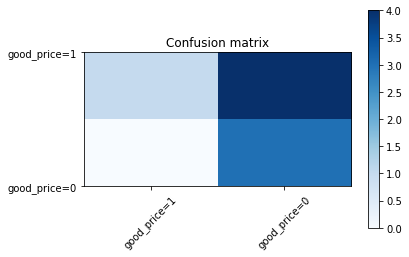

In [141]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good_price=1','good_price=0'],normalize= False,  title='Confusion matrix')

In [142]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.20      0.33         5

    accuracy                           0.50         8
   macro avg       0.71      0.60      0.47         8
weighted avg       0.79      0.50      0.43         8



# So as a conclusion I can say that the number of venues nearby the Airbnbs doesn't matter in the term of prices. The minimum nights neither do matter and as for the reviews it seems that investors have to buy flats, which they can list on lower prices. On lower prices more and more costumers will come. Investors will earn bigger profit.